In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy Modelo de optiizacion para una mejor obtenion de thetas
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [106]:
import pandas as pd #Manipulacion y analisis de datos
#sklearn, para tareas de aprendizaje automatico
#utilizamos la funcion train_test_split del modulo model_selection
#Esta funcion se utiliza para dividir un conjunto de datos
# en dos subconjuntos, uno para entrenamiento y otro para prueba
from sklearn.model_selection import train_test_split
#Importamos la funcion LabelEncoder del modulo preprocessing
#Se utiliza para codificar etiquetas categoricas en forma numerica
from sklearn.preprocessing import LabelEncoder

In [107]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/IA/Laboratorios/Laboratorio_3/RICE.csv', delimiter=',')

In [108]:
display(data)  #Borrar el ID

,Observation Year,Standard Week,Pest Value,Collection Type,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm),PEST NAME,Location
0,2003,1,0.0,Number/hill,27.9,14.8,94.7,51.3,0.0,3.1,8.7,2.7,Brownplanthopper,Cuttack
1,2003,2,0.0,Number/hill,27.2,15.0,93.9,53.1,0.0,2.1,8.7,2.4,Brownplanthopper,Cuttack
2,2003,3,0.0,Number/hill,28.7,18.3,94.1,56.7,0.6,4.8,6.7,2.8,Brownplanthopper,Cuttack
3,2003,4,0.0,Number/hill,25.3,16.4,90.9,57.4,0.3,6.5,5.3,3.0,Brownplanthopper,Cuttack
4,2003,5,0.0,Number/hill,28.8,18.7,95.7,55.0,0.0,5.2,6.3,2.8,Brownplanthopper,Cuttack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19399,2011,48,31.0,Number/Light trap,30.2,17.2,78.1,41.6,0.0,0.0,0.0,0.0,Yellowstemborer,Rajendranagar
19400,2011,49,38.0,Number/Light trap,30.5,12.9,84.3,33.4,0.0,0.0,0.0,0.0,Yellowstemborer,Rajendranagar
19401,2011,50,6.0,Number/Light trap,30.2,14.2,83.4,49.6,0.0,0.0,0.0,0.0,Yellowstemborer,Rajendranagar
19402,2011,51,13.0,Number/Light trap,29.0,11.8,81.9,49.3,0.0,0.0,0.0,0.0,Yellowstemborer,Rajendranagar


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Observation Year  19404 non-null  int64  
 1   Standard Week     19404 non-null  int64  
 2   Pest Value        19404 non-null  float64
 3   Collection Type   19404 non-null  object 
 4   MaxT              19404 non-null  float64
 5   MinT              19404 non-null  float64
 6   RH1(%)            19404 non-null  float64
 7   RH2(%)            19404 non-null  float64
 8   RF(mm)            19404 non-null  float64
 9   WS(kmph)          19404 non-null  float64
 10  SSH(hrs)          19404 non-null  float64
 11  EVP(mm)           19404 non-null  float64
 12  PEST NAME         19404 non-null  object 
 13  Location          19404 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


In [110]:
# axis=1, indica que se está eliminando una columna y no una fila
# inplace=True, indica que la eliminación se realizará directamente en el DataFrame data
data.drop(['Collection Type'], axis=1, inplace=True)
data.drop(['PEST NAME'], axis=1, inplace=True)
data.drop(['Location'], axis=1, inplace=True)

In [111]:
#Transformacion de columnas categoricas a numericas
#selecciona las columnas del dataset de tipo object
columnas_categoricas = data.select_dtypes(include=['object']).columns
#El for recorrera cada columna categorica
for columna in columnas_categoricas:
  #El LabelEncoder se utiliza para codificar las etiquetas categóricas como valores numéricos
  le = LabelEncoder()
  #aplica la transformación a la columna actual
  #El método fit_transform del LabelEncoder ajusta el codificador a los datos de la columna
  # y transforma las etiquetas categóricas en valores numéricos
  data[columna] = le.fit_transform(data[columna])




In [112]:
  data['Pest Value'] = data['Pest Value'].apply(lambda x: 1 if x > 0 else 0)

In [113]:
display(data)

,Observation Year,Standard Week,Pest Value,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm)
0,2003,1,0,27.9,14.8,94.7,51.3,0.0,3.1,8.7,2.7
1,2003,2,0,27.2,15.0,93.9,53.1,0.0,2.1,8.7,2.4
2,2003,3,0,28.7,18.3,94.1,56.7,0.6,4.8,6.7,2.8
3,2003,4,0,25.3,16.4,90.9,57.4,0.3,6.5,5.3,3.0
4,2003,5,0,28.8,18.7,95.7,55.0,0.0,5.2,6.3,2.8
...,...,...,...,...,...,...,...,...,...,...,...
19399,2011,48,1,30.2,17.2,78.1,41.6,0.0,0.0,0.0,0.0
19400,2011,49,1,30.5,12.9,84.3,33.4,0.0,0.0,0.0,0.0
19401,2011,50,1,30.2,14.2,83.4,49.6,0.0,0.0,0.0,0.0
19402,2011,51,1,29.0,11.8,81.9,49.3,0.0,0.0,0.0,0.0


In [114]:
# X incluye todas las columnas excepto 'Pest Value'
X = data.drop(['Pest Value'], axis=1)

# y es la columna 'Pest Value'
y = data['Pest Value']

# m es el número de elementos en y
m = y.size


In [115]:
print(X)
print('-'*40)
print(y)

       Observation Year  Standard Week  MaxT  MinT  RH1(%)  RH2(%)  RF(mm)  \
0                  2003              1  27.9  14.8    94.7    51.3     0.0   
1                  2003              2  27.2  15.0    93.9    53.1     0.0   
2                  2003              3  28.7  18.3    94.1    56.7     0.6   
3                  2003              4  25.3  16.4    90.9    57.4     0.3   
4                  2003              5  28.8  18.7    95.7    55.0     0.0   
...                 ...            ...   ...   ...     ...     ...     ...   
19399              2011             48  30.2  17.2    78.1    41.6     0.0   
19400              2011             49  30.5  12.9    84.3    33.4     0.0   
19401              2011             50  30.2  14.2    83.4    49.6     0.0   
19402              2011             51  29.0  11.8    81.9    49.3     0.0   
19403              2011             52  29.8  11.6    83.6    31.6     0.0   

       WS(kmph)  SSH(hrs)  EVP(mm)  
0           3.1       8.7 

In [116]:
# Funcion train_test_split, que recibe X y y, test_size es el tamaño de prueba SE DIVIDE EL DATASET ORIGINAL ENTRE UNO DE ENTRENAMIENTO Y OTRO DE PRUEBA 0.2 TAMAÑO DE PRUEBAs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4) # Semilla

In [117]:
print("Datos entrenamiento> ")
print(X_train)
print('-'*40)
print(y_train)

Datos entrenamiento> 
       Observation Year  Standard Week  MaxT  MinT  RH1(%)  RH2(%)  RF(mm)  \
18773              1996             11  37.5  17.9    71.7    18.0     0.0   
1800               2007             33  34.3  27.2    86.0    68.1     6.2   
4655               2008             46  27.9  21.1    89.7    74.7    96.5   
14478              2011             42  32.9  19.9    89.9    66.9     1.0   
418                1966              3  26.4  12.2    93.0    35.6     0.0   
...                 ...            ...   ...   ...     ...     ...     ...   
16840              1997             12  37.5  20.6    61.9    29.3     0.0   
11863              2007             27  29.9  24.9    85.7    76.7    80.6   
17093              2002             47  29.7  12.0    81.3    31.1     0.0   
8366               1998             14  33.4  22.1    84.6    81.9     0.0   
17530              2007             16  34.8  22.2    75.7    36.1    15.2   

       WS(kmph)  SSH(hrs)  EVP(mm)  
1877

In [118]:
print("Datos prueba> ")
print(X_test)
print('-'*40)
print(y_test)

Datos prueba> 
       Observation Year  Standard Week  MaxT  MinT  RH1(%)  RH2(%)  RF(mm)  \
16623              1993              3  30.7  13.1    75.3    28.3     0.0   
1553               2007             46  27.6  11.2    96.1    35.0     0.0   
18041              1980              7  32.6  18.1    79.9    30.3     0.0   
16126              2011             26  35.0  24.2    74.7    44.3     9.6   
15271              2008              3  31.1  12.0    78.1    23.9     0.0   
...                 ...            ...   ...   ...     ...     ...     ...   
1524               2007             17  39.5  20.8    48.6    13.3     0.0   
17396              2010             38  29.2  21.9    89.7    67.6    33.8   
2454               2007             11  21.7  11.2    92.9    56.0    36.8   
10580              1985             44  21.9  11.3    51.0    40.6     0.0   
19316              2010             17  40.3  26.5    67.9    39.0     0.0   

       WS(kmph)  SSH(hrs)  EVP(mm)  
16623      

In [119]:
def  featureNormalize(X):
    X_norm = X_train.copy()
    mu = np.zeros(X_train.shape[1])
    sigma = np.zeros(X_train.shape[1])

    mu = np.mean(X_train, axis = 0)
    sigma = np.std(X_train, axis = 0)
    X_norm = (X_train - mu) / sigma

    return X_norm, mu, sigma

In [120]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)

print('Media calculada:\n',mu)
print('Desviación estandar calculada:\n',sigma)
print('Matriz con valores normalizados:\n',X_norm)

Media calculada:
 Observation Year    2000.061586
Standard Week         26.537267
MaxT                  31.195826
MinT                  20.426412
RH1(%)                82.153385
RH2(%)                53.737435
RF(mm)                19.513619
WS(kmph)               4.505804
SSH(hrs)               6.846293
EVP(mm)                5.902293
dtype: float64
Desviación estandar calculada:
 Observation Year     9.792872
Standard Week       14.986995
MaxT                 4.882962
MinT                 5.359493
RH1(%)              13.944726
RH2(%)              18.957140
RF(mm)              39.156950
WS(kmph)             3.195317
SSH(hrs)             3.889820
EVP(mm)              6.552854
dtype: float64
Matriz con valores normalizados:
        Observation Year  Standard Week      MaxT      MinT    RH1(%)  \
18773         -0.414749      -1.036717  1.291055 -0.471390 -0.749630   
1800           0.708517       0.431223  0.635715  1.263848  0.275847   
4655           0.810632       1.298641 -0.674964  

In [121]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la entrada a un arreglo numpy
    z = np.array(z)
    #creamos un arreglo de ceros en g, de la misma cantidad de z
    g = np.zeros(z.shape)
    #calcula la funcion sigmoideal
    g = 1 / (1 + np.exp(-z))   #e^(-z)

    return g

In [122]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [123]:
# Configurar la matriz adecuadamente, y agregar una columna de unos
m = X_train.shape[0]
X_train = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [124]:
def calcularCosto(theta, X_train, y_train):
    # Inicializar algunos valores utiles
    m = y_train.size  # numero de ejemplos de entrenamiento
    #epsilon = 1e-8

    J = 0
    h = sigmoid(X_train.dot(theta.T))
    J = (1 / m) * np.sum(-y_train.dot(np.log(h)) - (1 - y_train).dot(np.log(1 - h)))

    return J

In [125]:
def descensoGradiente(theta, X_train, y_train, alpha, num_iters):
    # Inicializa algunos valores
    m = y_train.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X_train.dot(theta.T))
        theta = theta - (alpha / m) * (h - y_train).dot(X_train)

        J_history.append(calcularCosto(theta, X_train, y_train))
    return theta, J_history

In [126]:
# Obtener la primera fila como una serie
primera_fila = X_test.iloc[0]

# Imprimir la primera fila en forma de fila
for valor in primera_fila:
    print(valor, end=',')

1993.0,3.0,30.7,13.1,75.3,28.3,0.0,1.8,9.9,3.0,

theta calculado por el descenso por el gradiente: [ 0.21955703  0.26609049  0.05516587 -0.02130036  0.65679342  0.36500228
  0.30728859 -0.20585553 -0.32583138  0.07642116  0.05081813]
El resultado entre falso o verdadero es (usando el descenso por el gradiente):1


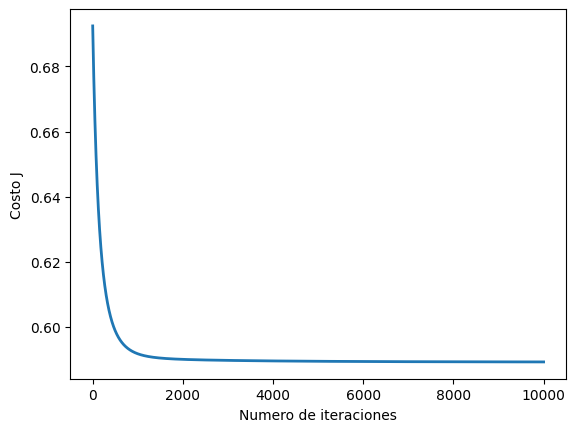

In [127]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X_train.shape[1]) # Initialize theta with the correct number of features
theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Make sure X_array has the same number of features as your model
X_array = [1,1.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 10.0, 2018.0, 1.0]  # Adjusted number of features
aprueba = sigmoid(np.dot(X_array, theta))

print('El resultado entre falso o verdadero es (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

In [128]:
print(X_test.shape)

(3881, 10)


In [129]:
m = X_test.shape[0]
print(m)

3881


In [130]:
n=X_test.shape[1]
X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)

In [131]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y_test.size  # numero de ejemplos de entrenamiento
    #Se define una pequeña cantidad epsilon para evitar problemas de logaritmo de cero en el cálculo de la función de costo
    epsilon = 1e-8

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X_test.dot(theta.T))

    J = (1 / m) * np.sum(-y_test.dot(np.log(h+epsilon)) - (1 - y_test).dot(np.log(1 - h+epsilon)))
    grad = (1 / m) * (h - y_test).dot(X_test)

    return J, grad

In [132]:
print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Gradiente en theta inicial (zeros):')
print('\t[{:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}]'.format(*grad))


Costo en theta inicial (zeros): 8.187
Gradiente en theta inicial (zeros):
	[0.44, 887.88, 10.97, 13.60, 8.28, 34.80, 21.04, 7.82, 2.19, 3.16, 2.55]


In [133]:
# Inicializa test_theta con el número correcto de elementos (11 en este caso)
test_theta = np.array([-0.5, 0.8, -1.2, 0.3, -0.7, 1.0, -1.5, 0.2, -0.9, 1.3, -0.4])

print(test_theta)

# Calcula el costo y gradiente usando la función de costo
cost, grad = costFunction(test_theta, X_test, y_test)

print('Costo en theta prueba: {:.2f}'.format(cost))


[-0.5  0.8 -1.2  0.3 -0.7  1.  -1.5  0.2 -0.9  1.3 -0.4]
Costo en theta prueba: 8.19


In [134]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    #Se define una pequeña cantidad epsilon para evitar problemas de logaritmo de cero en el cálculo de la función de costo
    epsilon = 1e-8

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T)) # Change X_test to X

    J = (1 / m) * np.sum(-y.dot(np.log(h+epsilon)) - (1 - y).dot(np.log(1 - h+epsilon))) # Change y_test to y
    grad = (1 / m) * (h - y).dot(X) # Change y_test to y and X_test to X

    return J, grad

In [135]:
print('theta:')
print('\t[{:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}]'.format(*theta))


theta:
	[0.22, 0.27, 0.06, -0.02, 0.66, 0.37, 0.31, -0.21, -0.33, 0.08, 0.05]


In [136]:
# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t{}'.format(theta)) # Simply print the entire theta array

Costo con un valor de theta encontrado por optimize.minimize: 8.187
theta:
	[ 0.21955703  0.26609049  0.05516587 -0.02130036  0.65679342  0.36500228
  0.30728859 -0.20585553 -0.32583138  0.07642116  0.05081813]


In [137]:
#X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)

In [138]:
def predict(theta, X_test):
    #devuelve el tamaño del primer eje de la matriz
    m = X_test.shape[0] # Numero de ejemplo de entrenamiento
    #Esta línea inicializa un vector p de tamaño m con ceros
    p = np.zeros(m)
    #Esta línea realiza las predicciones utilizando la función sigmoide y el producto punto entre X_test y theta.T
    p = np.round(sigmoid(X_test.dot(theta.T)))
    return p

In [139]:
print(X_test.shape)

(3881, 11)


In [140]:
print(theta.shape)

(11,)


In [141]:
# Vector de entrada corregido con 11 elementos
X_array = [1.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 10.0, 2018.0, 1.0, 19.0]

# Calcula la probabilidad usando el theta optimizado
prob = sigmoid(np.dot(X_array, theta))
print('Con estos datos la predicción es: {:.0f}'.format(prob))

# Calcula las predicciones en el conjunto de prueba
p = predict(theta, X_test)

# Calcula el porcentaje de precisión
precision = np.mean(p == y_test) * 100
print('Precisión del modelo en el conjunto de prueba: {:.2f}%'.format(precision))


Con estos datos la predicción es: 0
Precisión del modelo en el conjunto de prueba: 55.55%
